In [1]:
import librosa
import os

audio_file_path1='females/100.wav'
audio_file_path2='males'
librosa_audio_dataFemale,librosa_sample_rateFemale=librosa.load(audio_file_path1)
filenamesF=os.listdir('females')
filenamesM = os.listdir('males')
type(filenamesF)
for i in range(len(filenamesF)):
    filenamesF[i] = 'females/'+filenamesF[i]
#filenamesF
for i in range(len(filenamesM)):
    filenamesM[i] = 'males/'+filenamesM[i]
#filenamesM
#librosa_audio_dataMale,librosa_sample_rateMale=librosa.load(audio_file_path2)



In [2]:
librosa_audio_dataFemale,librosa_sample_rateFemale

(array([0.0212704 , 0.06236166, 0.07361213, ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 22050)

In [3]:
librosa_sample_rateFemale

22050

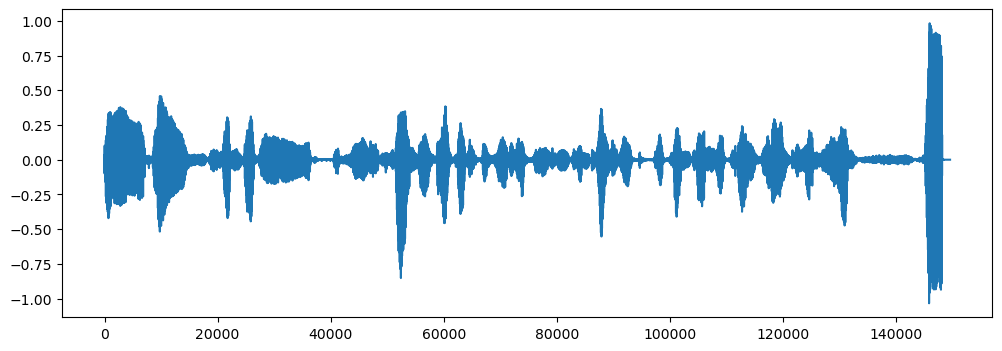

In [4]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_dataFemale)

In [5]:
import numpy as np

In [6]:
mfccs = librosa.feature.mfcc(y=librosa_audio_dataFemale, sr=librosa_sample_rateFemale, n_mfcc=13)
print(mfccs.shape)
print (mfccs)
from IPython.display import Audio

(13, 293)
[[-182.70164   -157.30453   -178.95793   ... -144.10602   -387.59525
  -603.5578   ]
 [ 134.7751     147.98093    147.38309   ...  117.9933      82.33737
     0.       ]
 [-103.12905   -130.6919    -138.80531   ... -115.51096    -61.322662
     0.       ]
 ...
 [  -9.766289   -14.141333   -13.759013  ...   -6.755198    -7.795045
     0.       ]
 [  -8.6309395   -1.7021405    1.2857134 ...  -11.645282   -15.009125
     0.       ]
 [  12.321934    11.123234     8.069349  ...   -7.368128   -10.946635
     0.       ]]


In [7]:
Audio(data=librosa_audio_dataFemale,rate=librosa_sample_rateFemale)

In [46]:
def featureExtractor (path):
    librosa_audio_data,librosa_sample_rate=librosa.load(path,res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=30)
    mfccs = np.mean(mfccs.T,axis=0)
    return mfccs

In [47]:
import pandas as pd

In [48]:
df1 = pd.DataFrame(columns=['Features','Class'])
df1

,Features,Class


In [49]:
featuresF=[]
featuresM=[]
for i in range(len(filenamesF)):
    featuresF.append(featureExtractor(filenamesF[i]))
for i in range(len(filenamesM)):
    featuresM.append(featureExtractor(filenamesM[i]))
#featuresF

In [50]:
df2 = pd.DataFrame(columns=['Features','Class'])
df1['Features'] = featuresF
df2['Features'] = featuresM

In [51]:
df1['Class'] = 0
df2['Class'] = 1

In [52]:
finalData = pd.concat([df1, df2], ignore_index=True)

In [53]:
finalData.head()

,Features,Class
0,"[-276.77335, 108.95326, -49.27461, 69.13086, -...",0
1,"[-323.56918, 124.88268, -57.39917, 35.384483, ...",0
2,"[-434.57178, 143.15839, -30.61476, 40.744156, ...",0
3,"[-272.5145, 103.69207, -71.81474, 44.7626, -19...",0
4,"[-235.0512, 134.27599, -60.28233, 57.540977, -...",0


In [54]:
finalData = finalData.sample(frac=1).reset_index(drop=True)

In [55]:
finalData.head()

,Features,Class
0,"[-355.23346, 150.8553, -16.330053, 28.905914, ...",1
1,"[-174.77174, 106.58882, -59.130196, 50.99181, ...",1
2,"[-295.0063, 109.653534, -61.429077, 72.6404, -...",0
3,"[-264.47513, 121.380646, -44.092632, 47.45256,...",1
4,"[-280.25226, 164.26326, -23.289968, 34.92711, ...",1


In [56]:
finalData.shape

(5993, 2)

In [57]:
X = np.array(finalData['Features'].tolist())
y = np.array(finalData['Class'].tolist())

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
X_train

array([[-263.23914   ,  169.26108   ,  -63.74898   , ...,   -2.3852036 ,
           3.1213534 ,   -1.9001217 ],
       [-315.01822   ,  107.542046  ,  -23.1036    , ...,   -8.476037  ,
          -2.4129114 ,   -4.5090637 ],
       [-460.16696   ,  130.59796   ,  -20.758648  , ...,   -3.2230012 ,
          -1.7550722 ,   -6.8373985 ],
       ...,
       [-168.929     ,  144.25511   ,  -19.054775  , ...,   -5.942518  ,
          -0.54847705,   -4.690192  ],
       [-240.25844   ,  162.43445   ,  -49.095448  , ...,   -7.709016  ,
          -2.2386637 ,   -3.8409116 ],
       [-474.83264   ,  117.20596   ,   -7.2886105 , ...,   -5.3405056 ,
          -3.0024767 ,   -5.5515523 ]], dtype=float32)

In [60]:
X_train.shape


(4794, 30)

In [61]:
y_train.shape

(4794,)

In [62]:
y_test.shape

(1199,)

In [63]:
y.shape

(5993,)

In [64]:

import tensorflow as tf


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [66]:
# num_labels=y.shape[1]
# num_labels

In [70]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(30,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [71]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [72]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,501 (169.93 KB)

 Trainable params: 43,501 (169.93 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
143/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 9.7939 
Epoch 1: val_loss improved from inf to 0.68156, saving model to audio_classification.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5221 - loss: 9.5836 - val_accuracy: 0.5988 - val_loss: 0.6816
Epoch 2/150
127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5548 - loss: 1.4689
Epoch 2: val_loss did not improve from 0.68156
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 1.4293 - val_accuracy: 0.6113 - val_loss: 0.6823
Epoch 3/150
136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.8106
Epoch 3: val_loss improved from 0.68156 to 0.68155, saving model to audio_classification.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5933 - loss: 0.8092 - val_accuracy: 0.6130 - val_loss: 0.6816
Epoch 4/150
139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5945 - loss: 0.7304
Epoch 4: val_loss improved from 0.68155 to 0.66904, saving model to

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8932 - loss: 0.2840
Epoch 24: val_loss did not improve from 0.25627
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8932 - loss: 0.2843 - val_accuracy: 0.9016 - val_loss: 0.2661
Epoch 25/150
125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8941 - loss: 0.2864
Epoch 25: val_loss did not improve from 0.25627
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.2877 - val_accuracy: 0.9016 - val_loss: 0.2756
Epoch 26/150
143/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.2841
Epoch 26: val_loss did not improve from 0.25627
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - loss: 0.2844 - val_accuracy: 0.9099 - val_loss: 0.2695
Epoch 27/150
133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9080 - loss: 0.2707
Epoch 27: val_loss did not improve from 0.25627
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9075 - loss: 0.2719 - val_accuracy: 0.9058 - val_loss: 0.2772
E

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.2619
Epoch 49: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8988 - loss: 0.2600 - val_accuracy: 0.9091 - val_loss: 0.2861
Epoch 50/150
129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8990 - loss: 0.2803
Epoch 50: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.2787 - val_accuracy: 0.9108 - val_loss: 0.2872
Epoch 51/150
138/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.2403
Epoch 51: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2417 - val_accuracy: 0.9083 - val_loss: 0.2903
Epoch 52/150
144/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2416
Epoch 52: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9127 - loss: 0.2418 - val_accuracy: 0.9108 - val_loss: 0.2938
E

Epoch 75/150
145/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9150 - loss: 0.2298
Epoch 75: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9149 - loss: 0.2302 - val_accuracy: 0.9133 - val_loss: 0.2661
Epoch 76/150
136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.2405
Epoch 76: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.2416 - val_accuracy: 0.9108 - val_loss: 0.2854
Epoch 77/150
122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9213 - loss: 0.2195
Epoch 77: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9197 - loss: 0.2225 - val_accuracy: 0.9041 - val_loss: 0.2846
Epoch 78/150
127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.2527
Epoch 78: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9059 - loss: 0.2517 - val_accuracy: 0.9124 - val_l

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.2135 - val_accuracy: 0.9074 - val_loss: 0.2997
Epoch 101/150
135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.2410
Epoch 101: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.2410 - val_accuracy: 0.9083 - val_loss: 0.2919
Epoch 102/150
137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9156 - loss: 0.2381
Epoch 102: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9157 - loss: 0.2379 - val_accuracy: 0.9083 - val_loss: 0.2918
Epoch 103/150
128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.2239
Epoch 103: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9206 - loss: 0.2262 - val_accuracy: 0.9099 - val_loss: 0.2963
Epoch 104/150
128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9206 - loss: 0.2117
Epoch 104: val_loss did not i

Epoch 126/150
121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9224 - loss: 0.2270
Epoch 126: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.2285 - val_accuracy: 0.9091 - val_loss: 0.2756
Epoch 127/150
133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.2506
Epoch 127: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.2489 - val_accuracy: 0.9083 - val_loss: 0.3030
Epoch 128/150
148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9132 - loss: 0.2422
Epoch 128: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.2420 - val_accuracy: 0.9074 - val_loss: 0.2851
Epoch 129/150
132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9126 - loss: 0.2449
Epoch 129: val_loss did not improve from 0.25536
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9126 - loss: 0.2433 - val_accuracy: 0.9099

In [74]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.904920756816864


In [75]:
filename="males/103.wav"
prediction_feature=featureExtractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)

# Convert probabilities to predicted classes
predicted_class = int(predicted_probabilities > 0.5)  # Assuming binary classification with threshold 0.5

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: 1
